**Halbleiterdetektor Untergrund**

In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import re
def parse_duration(duration):
    # Regex für das erweiterte Format P1DT5H27M33.708S
    match = re.match(r'P(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(\d+\.\d+)S', duration)
    if not match:
        raise ValueError("Ungültiges Format")
    
    days = int(match.group(1)) if match.group(1) else 0
    hours = int(match.group(2)) if match.group(2) else 0
    minutes = int(match.group(3)) if match.group(3) else 0
    seconds = float(match.group(4)) if match.group(4) else 0.0
    
    total_seconds = (days * 86400) + (hours * 3600) + (minutes * 60) + seconds
    return total_seconds

# Function for Gaussian fit
def gaussian(x, a, mu, sigma, b):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2)) + b

# Initial guesses for the parameters of the Gaussian fits
def fit_peak(x, y, initial_guess):
    # Perform curve fitting
    params, pcov = curve_fit(gaussian, x, y, p0=initial_guess)
    return params, pcov

# Definition der linearen Funktion
def linear_func(x, slope, intercept):
    return slope * x + intercept

def epsilon(E, a, b):
    lnE = np.log(E)
    return (a + b * lnE) / E

print("run")

run


Daten eingelesen
 Livetime in s: 661.701


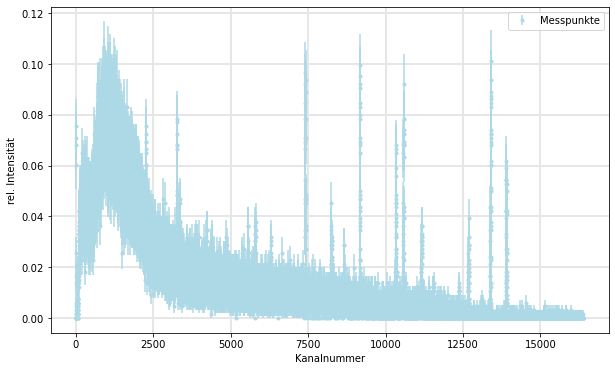

Ge Untergrund
nUntergurnd: 228.7196180752023
nUntErr: 0.5879234909101516


In [121]:


# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/Ge_untergrund.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

# # # Ausgabe der extrahierten Daten
# print("RealTimeDuration Daten:")
# for duration in livetime_durations:
#     print(duration)

# print("\nChannelData Daten:")
# for channel_data in channel_data_list:
#     print(channel_data)

print("Daten eingelesen") 

total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

print(f' Livetime in s: {total_seconds}')

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue')

plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()
# Speichere den Plot
# plotname = '521/GeUntergrund.png'
# plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()

nUntergrund=0;
for n in y_data:
    nUntergrund+=n
nUntErr=0
for n in y_err:
    nUntErr+=n**2
print('Ge Untergrund')
print(f'nUntergurnd: {nUntergrund}')
print(f'nUntErr: {np.sqrt(nUntErr)}')

**Halbleiterdetektor Cobalt**

Daten eingelesen
Amplitude: 4.302659433742864 ± 0.006555614641568968
Mittelwert (mu): 12680.436542231508 ± 0.014520972266361383
Sigma: 8.264033245869982 ± 0.014575267624521911
Basiswert (b): 0.009043025907741715 ± 0.0004627322252591333
Peak 1:
  Höhe (a): 5.102281975796939 ± 0.045705999440492306
  Mean (mu): 11164.790249281226 ± 0.07992547072326264
  Standard deviation (sigma): 7.728037751083285 ± 0.07995895967394644
  Background (b): 0.08622726316113906 ± 0.0010802819891703797

 Livetime in s: 607.522


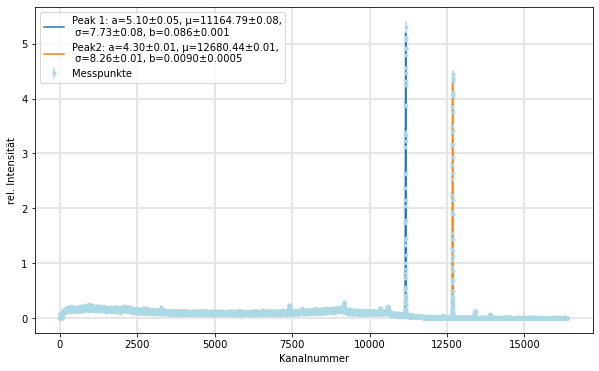

Ge co
n Total: 1511.4991720465146
n Total Err: 1.5773314113563428


In [122]:

def parse_duration(duration):
    # Regex für das Format PT11M1.701S
    match = re.match(r'PT(\d+)M(\d+\.\d+)S', duration)
    if not match:
        raise ValueError("Ungültiges Format")
    
    minutes = int(match.group(1))
    seconds = float(match.group(2))
    
    total_seconds = minutes * 60 + seconds
    return total_seconds


# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/Ge_co.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

# # Ausgabe der extrahierten Daten
# print("RealTimeDuration Daten:")
# for duration in realtime_durations:
#     print(duration)

# print("\nChannelData Daten:")
# for channel_data in channel_data_list:
#     print(channel_data)

print("Daten eingelesen") 



# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

# Fit parameters for each peak
peak_params = []
peak_covs = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak, pcov_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)




# Daten filtern
mask = (x_data > 12000) & (x_data < 14000)
newxdata = x_data[mask]
newydata = y_data[mask]
initial_guess = [1, 12680, 4, 0]

# Curve fitting
popt, pcov = curve_fit(gaussian, newxdata, newydata, p0=initial_guess)

# Extrahieren der Parameter und Unsicherheiten
a, mu, sigma, b = popt
delta_a, delta_mu, delta_sigma, delta_b = np.sqrt(np.diag(pcov))

print(f'Amplitude: {a} ± {delta_a}')
print(f'Mittelwert (mu): {mu} ± {delta_mu}')
print(f'Sigma: {sigma} ± {delta_sigma}')
print(f'Basiswert (b): {b} ± {delta_b}')


# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print()
    
        
print(f' Livetime in s: {total_seconds}')

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue')

# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.2f}±{delta_a_fit:.2f}, μ={mu_fit:.2f}±{delta_mu_fit:.2f},\n σ={sigma_fit:.2f}±{delta_sigma_fit:.2f}, b={b_fit:.3f}±{delta_b_fit:.3f}')
    
plt.plot(newxdata, gaussian(newxdata, *popt), label=f'Peak2: a={a:.2f}±{delta_a:.2f}, μ={mu:.2f}±{delta_mu:.2f},\n σ={sigma:.2f}±{delta_sigma:.2f}, b={b:.4f}±{delta_b:.4f} ' )
    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=2)

# Speichere den Plot
# plotname = '521/GeCo.png'
# plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


nTotal=0
nTotErr=0
for n in y_data:
    nTotal+=n
for n in y_err:
    nTotErr+=n**2
    
print('Ge co')
print(f'n Total: {nTotal}')   
print(f'n Total Err: {np.sqrt(nTotErr)}') 

Daten eingelesen
Peak 1:
  Höhe (a): 17.549900065919225 ± 0.037400046538207776
  Mean (mu): 6295.839865679589 ± 0.015030056313442697
  Standard deviation (sigma): 6.108518299397163 ± 0.015035031749393874
  Background (b): 0.07378725512898827 ± 0.0007857242471023316
 Livetime in s: 605.982


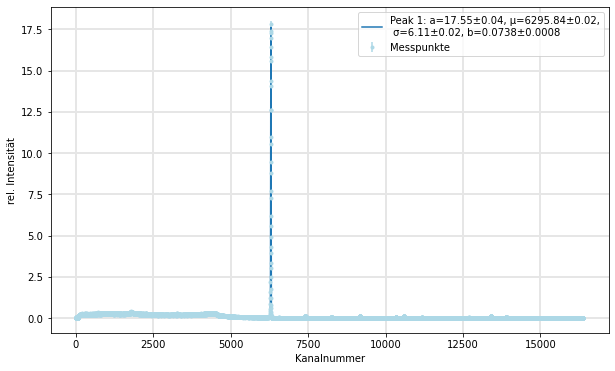

Ge cs
n Total: 1477.576891722716
n Total Err: 1.561511486093841


In [123]:

datei_pfad = '521/Ge_cs.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))


print("Daten eingelesen") 



# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

# Fit parameters for each peak
peak_params = []
peak_covs = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak, pcov_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)



# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue')

# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print(f' Livetime in s: {total_seconds}')
# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.2f}±{delta_a_fit:.2f}, μ={mu_fit:.2f}±{delta_mu_fit:.2f},\n σ={sigma_fit:.2f}±{delta_sigma_fit:.2f}, b={b_fit:.4f}±{delta_b_fit:.4f}')
    
    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
plotname = '521/GeCs.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()

nTotal=0
nTotErr=0
for n in y_data:
    nTotal+=n
for n in y_err:
    nTotErr+=n**2
    
print('Ge cs')
print(f'n Total: {nTotal}')   
print(f'n Total Err: {np.sqrt(nTotErr)}') 

**Halbleiter Eu**

Daten eingelesen
total sec :604.039
Peak 1:
  Höhe (a): 13.732556948843484 ± 0.08459370560631796
  Mean (mu): 1157.8616827208427 ± 0.03179236802255538
  Standard deviation (sigma): 4.469915184175301 ± 0.031800065479871235
  Background (b): 0.07546024195443914 ± 0.0015198961178840222

Peak 2:
  Höhe (a): 2.7677425089442083 ± 0.07501837513706205
  Mean (mu): 2327.606503346063 ± 0.15410412181484978
  Standard deviation (sigma): 4.92301618776729 ± 0.15414840014551373
  Background (b): 0.05892165819556297 ± 0.00146828934256399

Peak 3:
  Höhe (a): 6.572313271366782 ± 0.029170444082949498
  Mean (mu): 3275.132014759132 ± 0.026265096030190723
  Standard deviation (sigma): 5.125124891067219 ± 0.026273608215928793
  Background (b): 0.039891733469087254 ± 0.0006063696622303156

Peak 4:
  Höhe (a): 0.4710064915057389 ± 0.02753567947033721
  Mean (mu): 3911.3184800880226 ± 0.3779878481145078
  Standard deviation (sigma): 5.592660875508063 ± 0.37813137031639554
  Background (b): 0.03493308545091198

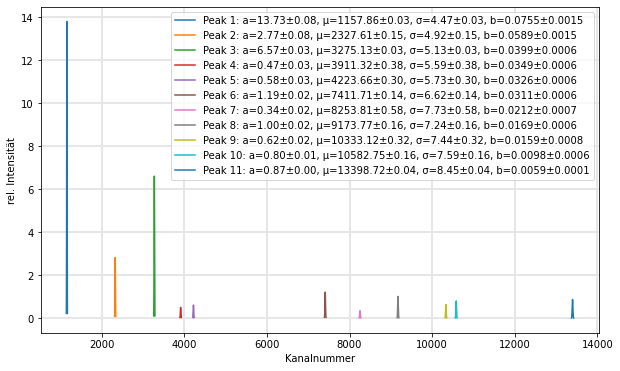

In [114]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/Ge_eu.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))


print("Daten eingelesen") 


# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

print(f'total sec :{total_seconds}')

# mask = (x_data > 2500) & (x_data < 5000)
# x_data = x_data[mask]
# y_data = y_data[mask]
# y_err=y_err[mask]
# Fit parameters for each peak
peak_params = []
peak_covs = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak, pcov_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)

# Manuell festgelegte Anfangswerte für den zweiten Peak
x_data_second_peak = x_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(x_data))]
y_data_second_peak = y_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(y_data))]
initial_guess_second_peak = (3000, 2400, 15, 30)
params_second_peak, pcov_second_peak = fit_peak(x_data_second_peak, y_data_second_peak, initial_guess_second_peak)

# Speichern der Parameter für den zweiten Peak
peak_params.append(params_second_peak)
peak_covs.append(pcov_second_peak)

# Dritter Peak
x_data_third_peak = x_data[(x_data > params_second_peak[1] + 3 * params_second_peak[2]) & (x_data < len(x_data))]
y_data_third_peak = y_data[(x_data > params_second_peak[1] + 3 * params_second_peak[2]) & (x_data < len(y_data))]
initial_guess_third_peak = (3063, 3275, 20, 35)
params_third_peak, pcov_third_peak = fit_peak(x_data_third_peak, y_data_third_peak, initial_guess_third_peak)
peak_params.append(params_third_peak)
peak_covs.append(pcov_third_peak)

# Vierter Peak
x_data_fourth_peak = x_data[(x_data > params_third_peak[1] + 3 * params_third_peak[2])]
y_data_fourth_peak = y_data[(x_data > params_third_peak[1] + 3 * params_third_peak[2])]
initial_guess_fourth_peak = (300, 3900, 10, 50)
params_fourth_peak, pcov_fourth_peak = fit_peak(x_data_fourth_peak, y_data_fourth_peak, initial_guess_fourth_peak)
peak_params.append(params_fourth_peak)
peak_covs.append(pcov_fourth_peak)

# Fünfter Peak
x_data_fifth_peak = x_data[(x_data > params_fourth_peak[1] + 3 * params_fourth_peak[2])]
y_data_fifth_peak = y_data[(x_data > params_fourth_peak[1] + 3 * params_fourth_peak[2])]
initial_guess_fifth_peak = (120, 4200, 15, 30)
params_fifth_peak, pcov_fifth_peak = fit_peak(x_data_fifth_peak, y_data_fifth_peak, initial_guess_fifth_peak)
peak_params.append(params_fifth_peak)
peak_covs.append(pcov_fifth_peak)

# Sechster Peak
x_data_sixth_peak = x_data[(x_data > params_fifth_peak[1] + 3 * params_fifth_peak[2])]
y_data_sixth_peak = y_data[(x_data > params_fifth_peak[1] + 3 * params_fifth_peak[2])]
initial_guess_sixth_peak = (710, 7400, 10, 50)
params_sixth_peak, pcov_sixth_peak = fit_peak(x_data_sixth_peak, y_data_sixth_peak, initial_guess_sixth_peak)
peak_params.append(params_sixth_peak)
peak_covs.append(pcov_sixth_peak)

# Siebter Peak
x_data_seventh_peak = x_data[(x_data > params_sixth_peak[1] + 3 * params_sixth_peak[2])]
y_data_seventh_peak = y_data[(x_data > params_sixth_peak[1] + 3 * params_sixth_peak[2])]
initial_guess_seventh_peak = (196, 8250, 15, 30)
params_seventh_peak, pcov_seventh_peak = fit_peak(x_data_seventh_peak, y_data_seventh_peak, initial_guess_seventh_peak)
peak_params.append(params_seventh_peak)
peak_covs.append(pcov_seventh_peak)

# Achter Peak
x_data_eighth_peak = x_data[(x_data > params_seventh_peak[1] + 3 * params_seventh_peak[2])]
y_data_eighth_peak = y_data[(x_data > params_seventh_peak[1] + 3 * params_seventh_peak[2])]
initial_guess_eighth_peak = (700, 9125, 45, 60)
params_eighth_peak, pcov_eighth_peak = fit_peak(x_data_eighth_peak, y_data_eighth_peak, initial_guess_eighth_peak)
peak_params.append(params_eighth_peak)
peak_covs.append(pcov_eighth_peak)

# Neunter Peak
x_data_ninth_peak = x_data[(x_data > params_eighth_peak[1] + 3 * params_eighth_peak[2])]
y_data_ninth_peak = y_data[(x_data > params_eighth_peak[1] + 3 * params_eighth_peak[2])]
initial_guess_ninth_peak = (374, 10333, 10, 50)
params_ninth_peak, pcov_ninth_peak = fit_peak(x_data_ninth_peak, y_data_ninth_peak, initial_guess_ninth_peak)
peak_params.append(params_ninth_peak)
peak_covs.append(pcov_ninth_peak)

# Zehnter Peak
x_data_tenth_peak = x_data[(x_data > params_ninth_peak[1] + 3 * params_ninth_peak[2])]
y_data_tenth_peak = y_data[(x_data > params_ninth_peak[1] + 3 * params_ninth_peak[2])]
initial_guess_tenth_peak = (70, 11000, 10, 50)
params_tenth_peak, pcov_tenth_peak = fit_peak(x_data_tenth_peak, y_data_tenth_peak, initial_guess_tenth_peak)
peak_params.append(params_tenth_peak)
peak_covs.append(pcov_tenth_peak)

# Elfter Peak
x_data_eleventh_peak = x_data[(x_data > params_tenth_peak[1] + 3 * params_tenth_peak[2])]
y_data_eleventh_peak = y_data[(x_data > params_tenth_peak[1] + 3 * params_tenth_peak[2])]
initial_guess_eleventh_peak = (526, 13400, 10, 50)
params_eleventh_peak, pcov_eleventh_peak = fit_peak(x_data_eleventh_peak, y_data_eleventh_peak, initial_guess_eleventh_peak)
peak_params.append(params_eleventh_peak)
peak_covs.append(pcov_eleventh_peak)

# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data,label='Messpunkte', marker='.',color='lightblue',alpha=0.02)

# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    if sigma_fit < 0:
        sigma_fit = -1 * sigma_fit
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.2f}±{delta_a_fit:.2f}, μ={mu_fit:.2f}±{delta_mu_fit:.2f}, σ={sigma_fit:.2f}±{delta_sigma_fit:.2f}, b={b_fit:.4f}±{delta_b_fit:.4f}')
    

    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
plotname = '521/GeEu.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


Daten eingelesen
total sec :604.039


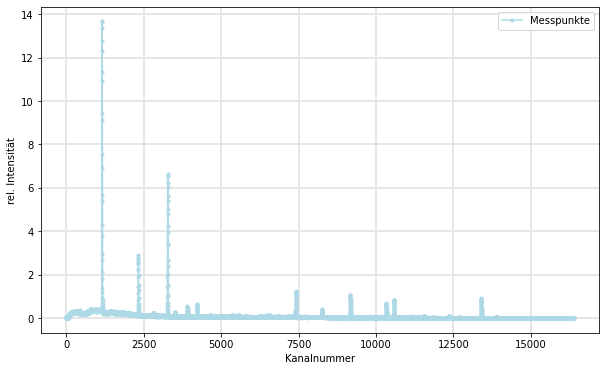

In [123]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/Ge_eu.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))


print("Daten eingelesen") 


# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

print(f'total sec :{total_seconds}')



# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data,label='Messpunkte', marker='.',color='lightblue')



    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
plotname = '521/GeEuComplete.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


**Szintillator**

Daten eingelesen
 Livetime in s: 607.667


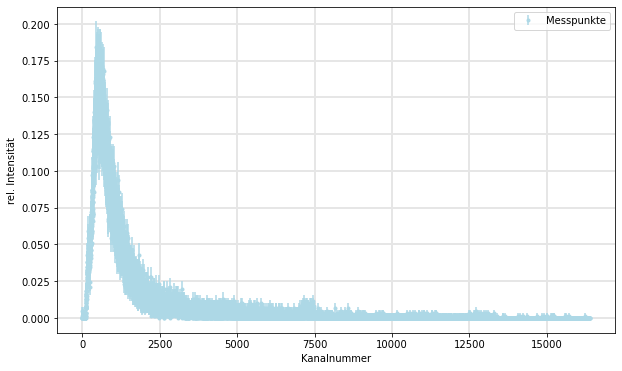

nUntergurnd: 153.36524774261488
nUntErr: 0.5023780480384261


In [124]:
# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/NaJ_untergrund.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

# # # Ausgabe der extrahierten Daten
# print("RealTimeDuration Daten:")
# for duration in livetime_durations:
#     print(duration)

# print("\nChannelData Daten:")
# for channel_data in channel_data_list:
#     print(channel_data)

print("Daten eingelesen") 

total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

print(f' Livetime in s: {total_seconds}')

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue')

plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()
# Speichere den Plot
# plotname = '521/SzUntergrund.png'
# plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()
nUntergrund=0;
for n in y_data:
    nUntergrund+=n
nUntErr=0
for n in y_err:
    nUntErr+=n**2
print(f'nUntergurnd: {nUntergrund}')
print(f'nUntErr: {np.sqrt(nUntErr)}')

Daten eingelesen
Amplitude: 0.3947700125518118 ± 0.007498033544842891
Mittelwert (mu): 6636.427065843338 ± 3.264512870147322
Sigma: 159.22498563598913 ± 3.9054899868182766
Basiswert (b): 0.10138037055447803 ± 0.003762413852230156
Peak 1:
  Höhe (a): 0.5234640351905268 ± 0.010347115303354297
  Mean (mu): 5856.176665540584 ± 3.8186449224069587
  Standard deviation (sigma): 167.8619436786009 ± 3.855139679607461
  Background (b): 0.11895336803601819 ± 0.0011670753143022134

 Livetime in s: 607.572


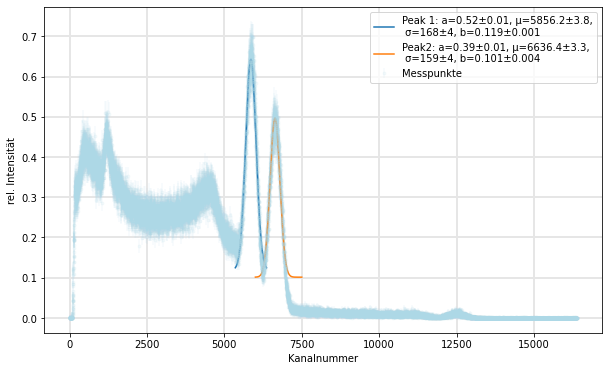

n Total: 2169.069674046822
n Total Err: 1.8894607542119295


In [125]:

datei_pfad = '521/NaJ_co.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))



print("Daten eingelesen") 


# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

# Fit parameters for each peak
peak_params = []
peak_covs = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak, pcov_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)



# Daten filtern
mask = (x_data > 6000) & (x_data < 7500)
newxdata = x_data[mask]
newydata = y_data[mask]
initial_guess = [1, 6636, 0.4, 0]

# Curve fitting
popt, pcov = curve_fit(gaussian, newxdata, newydata, p0=initial_guess)

# Extrahieren der Parameter und Unsicherheiten
a, mu, sigma, b = popt
delta_a, delta_mu, delta_sigma, delta_b = np.sqrt(np.diag(pcov))

print(f'Amplitude: {a} ± {delta_a}')
print(f'Mittelwert (mu): {mu} ± {delta_mu}')
print(f'Sigma: {sigma} ± {delta_sigma}')
print(f'Basiswert (b): {b} ± {delta_b}')


# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print()
    
        
print(f' Livetime in s: {total_seconds}')

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue', alpha=0.1)

# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.2f}±{delta_a_fit:.2f}, μ={mu_fit:.1f}±{delta_mu_fit:.1f},\n σ={sigma_fit:.0f}±{delta_sigma_fit:.0f}, b={b_fit:.3f}±{delta_b_fit:.3f}')
    
plt.plot(newxdata, gaussian(newxdata, *popt), label=f'Peak2: a={a:.2f}±{delta_a:.2f}, μ={mu:.1f}±{delta_mu:.1f},\n σ={sigma:.0f}±{delta_sigma:.0f}, b={b:.3f}±{delta_b:.3f} ' )
    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
# plotname = '521/SzCo.png'
# plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()

nTotal=0
nTotErr=0
for n in y_data:
    nTotal+=n
for n in y_err:
    nTotErr+=n**2
    
print(f'n Total: {nTotal}')   
print(f'n Total Err: {np.sqrt(nTotErr)}')  

Daten eingelesen
Peak 1:
  Höhe (a): 1.9819361928683317 ± 0.017858584053104264
  Mean (mu): 3377.2786637939193 ± 1.1697816752965418
  Standard deviation (sigma): 112.66899798308621 ± 1.177158401023749
  Background (b): 0.08227967114742464 ± 0.001636687374422519
 Livetime in s: 602.741


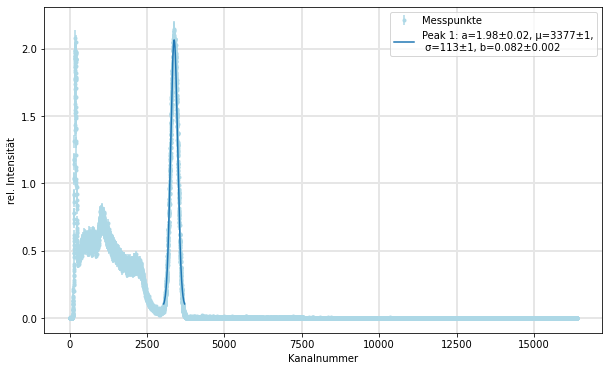

n Total: 1907.724876854312
n Total Err: 1.7790678206303971


In [126]:

datei_pfad = '521/NaJ_cs.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

print("Daten eingelesen") 



# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

# Fit parameters for each peak
peak_params = []
peak_covs = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak, pcov_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)



# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue')

# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print(f' Livetime in s: {total_seconds}')
# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.errorbar(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.2f}±{delta_a_fit:.2f}, μ={mu_fit:.0f}±{delta_mu_fit:.0f},\n σ={sigma_fit:.0f}±{delta_sigma_fit:.0f}, b={b_fit:.3f}±{delta_b_fit:.3f}')
    
    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
# plotname = '521/SzCs.png'
# plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


nTotalMask=(x_data<7250)
nTotalY=y_data[nTotalMask]
nTotal=0
nTotErr=0
for n in y_data:
    nTotal+=n
for n in y_err:
    nTotErr+=n**2
    
print(f'n Total: {nTotal}')   
print(f'n Total Err: {np.sqrt(nTotErr)}')         

Daten eingelesen
total sec :605.843
Peak 1:
  Höhe (a): 6.300023138751653 ± 0.0579158032859935
  Mean (mu): 233.8296377015394 ± 0.32919635123199886
  Standard deviation (sigma): 31.047428039025938 ± 0.33035044208658176
  Background (b): 0.19371025930380473 ± 0.003958506157175888

Peak 2:
  Höhe (a): 2.5244153259404114 ± 0.02586935610092754
  Mean (mu): 670.7749289466633 ± 0.36699126785889885
  Standard deviation (sigma): 33.45335899413757 ± 0.4474746319339795
  Background (b): 0.7411915492254214 ± 0.013687746511921091

Peak 3:
  Höhe (a): 0.3396785285024575 ± 0.007971410357390404
  Mean (mu): 1284.9294390172176 ± 1.3854875717392483
  Standard deviation (sigma): 57.90820483569798 ± 1.8729218947895032
  Background (b): 0.31595480060161335 ± 0.005260660193690804

Peak 4:
  Höhe (a): 0.760097208287201 ± 0.005728447902742692
  Mean (mu): 1797.4749709502078 ± 0.4173776197873482
  Standard deviation (sigma): 77.09675954240934 ± 0.8452427919119079
  Background (b): 0.1636224331429347 ± 0.00576

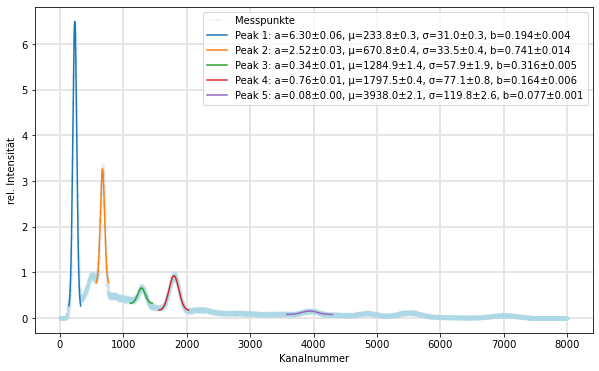

In [113]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/NaJ_eu.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))


print("Daten eingelesen") 


total_seconds = parse_duration(livetime_durations[0])
# Normierte Zählrate berechnen
y_data = []
y_err = []

for i in range(8000):
    y_data.append(channel_data_list[i] / total_seconds)
    y_err.append(np.sqrt(channel_data_list[i]) / total_seconds)

# Konvertiere Listen in numpy Arrays
y_data = np.array(y_data)
y_err = np.array(y_err)

x_data = np.arange(len(y_data))

print(f'total sec :{total_seconds}')


# Fit parameters for each peak
peak_params = []
peak_covs = []

# Fit first peak
initial_guess_first_peak = (max(y_data), np.argmax(y_data), 1.0, min(y_data))
params_first_peak, pcov_first_peak = fit_peak(x_data, y_data, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)

# Manuell festgelegte Anfangswerte für den zweiten Peak
mask = (x_data > 500) & (x_data < 800)

x_data_second_peak = x_data[mask]
y_data_second_peak = y_data[mask]
initial_guess_second_peak = (1, 670, 6, 1)
params_second_peak, pcov_second_peak = fit_peak(x_data_second_peak, y_data_second_peak, initial_guess_second_peak)
peak_params.append(params_second_peak)
peak_covs.append(pcov_second_peak)

# Dritter Peak
mask = (x_data > 1070) & (x_data < 1500)
x_data_third_peak = x_data[mask]
y_data_third_peak = y_data[mask]
initial_guess_third_peak = (1, 1289, 2, 1)
params_third_peak, pcov_third_peak = fit_peak(x_data_third_peak, y_data_third_peak, initial_guess_third_peak)
peak_params.append(params_third_peak)
peak_covs.append(pcov_third_peak)

# Vierter Peak
mask = (x_data > 1590) & (x_data < 2000)

x_data_fourth_peak = x_data[mask]
y_data_fourth_peak = y_data[mask]
initial_guess_fourth_peak = (1, 1797, 1, 50)
params_fourth_peak, pcov_fourth_peak = fit_peak(x_data_fourth_peak, y_data_fourth_peak, initial_guess_fourth_peak)
peak_params.append(params_fourth_peak)
peak_covs.append(pcov_fourth_peak)

# Fünfter Peak
mask = (x_data > 3400) & (x_data < 4500)
x_data_fifth_peak = x_data[mask]
y_data_fifth_peak = y_data[mask]
initial_guess_fifth_peak = (120, 3939, 15, 30)
params_fifth_peak, pcov_fifth_peak = fit_peak(x_data_fifth_peak, y_data_fifth_peak, initial_guess_fifth_peak)
peak_params.append(params_fifth_peak)
peak_covs.append(pcov_fifth_peak)

# # Sechster Peak
# mask = (x_data > 5200) & (x_data < 5800)

# x_data_sixth_peak = x_data[mask]
# y_data_sixth_peak = y_data[mask]
# initial_guess_sixth_peak = (710, 5500, 10, 50)
# params_sixth_peak, pcov_sixth_peak = fit_peak(x_data_sixth_peak, y_data_sixth_peak, initial_guess_sixth_peak)
# peak_params.append(params_sixth_peak)
# peak_covs.append(pcov_sixth_peak)

# # Siebter Peak
# mask = (x_data > 6600) & (x_data < 7300)

# x_data_seventh_peak = x_data[(x_data > params_sixth_peak[1] + 3 * params_sixth_peak[2])]
# y_data_seventh_peak = y_data[(x_data > params_sixth_peak[1] + 3 * params_sixth_peak[2])]
# initial_guess_seventh_peak = (196, 6996, 15, 30)
# params_seventh_peak, pcov_seventh_peak = fit_peak(x_data_seventh_peak, y_data_seventh_peak, initial_guess_seventh_peak)
# peak_params.append(params_seventh_peak)
# peak_covs.append(pcov_seventh_peak)

# # Achter Peak
# x_data_eighth_peak = x_data[(x_data > params_seventh_peak[1] + 3 * params_seventh_peak[2])]
# y_data_eighth_peak = y_data[(x_data > params_seventh_peak[1] + 3 * params_seventh_peak[2])]
# initial_guess_eighth_peak = (700, 9125, 45, 60)
# params_eighth_peak, pcov_eighth_peak = fit_peak(x_data_eighth_peak, y_data_eighth_peak, initial_guess_eighth_peak)
# peak_params.append(params_eighth_peak)
# peak_covs.append(pcov_eighth_peak)

# # Neunter Peak
# x_data_ninth_peak = x_data[(x_data > params_eighth_peak[1] + 3 * params_eighth_peak[2])]
# y_data_ninth_peak = y_data[(x_data > params_eighth_peak[1] + 3 * params_eighth_peak[2])]
# initial_guess_ninth_peak = (374, 10333, 10, 50)
# params_ninth_peak, pcov_ninth_peak = fit_peak(x_data_ninth_peak, y_data_ninth_peak, initial_guess_ninth_peak)
# peak_params.append(params_ninth_peak)
# peak_covs.append(pcov_ninth_peak)

# # Zehnter Peak
# x_data_tenth_peak = x_data[(x_data > params_ninth_peak[1] + 3 * params_ninth_peak[2])]
# y_data_tenth_peak = y_data[(x_data > params_ninth_peak[1] + 3 * params_ninth_peak[2])]
# initial_guess_tenth_peak = (70, 10370, 10, 50)
# params_tenth_peak, pcov_tenth_peak = fit_peak(x_data_tenth_peak, y_data_tenth_peak, initial_guess_tenth_peak)
# peak_params.append(params_tenth_peak)
# peak_covs.append(pcov_tenth_peak)

# # Elfter Peak
# x_data_eleventh_peak = x_data[(x_data > params_tenth_peak[1] + 3 * params_tenth_peak[2])]
# y_data_eleventh_peak = y_data[(x_data > params_tenth_peak[1] + 3 * params_tenth_peak[2])]
# initial_guess_eleventh_peak = (526, 13400, 10, 50)
# params_eleventh_peak, pcov_eleventh_peak = fit_peak(x_data_eleventh_peak, y_data_eleventh_peak, initial_guess_eleventh_peak)
# peak_params.append(params_eleventh_peak)
# peak_covs.append(pcov_eleventh_peak)

# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data,label='Messpunkte', marker='.',color='lightblue',alpha=0.1)

# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    if sigma_fit < 0:
        sigma_fit = -1 * sigma_fit
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.2f}±{delta_a_fit:.2f}, μ={mu_fit:.1f}±{delta_mu_fit:.1f}, σ={sigma_fit:.1f}±{delta_sigma_fit:.1f}, b={b_fit:.3f}±{delta_b_fit:.3f}')
    

    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
plotname = '521/SzEu.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


Daten eingelesen
total sec :605.843


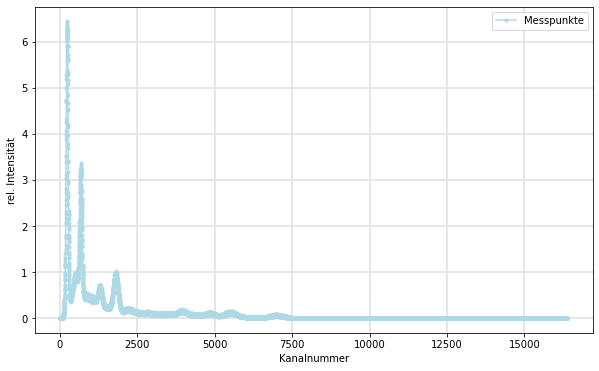

In [119]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/NaJ_eu.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))


print("Daten eingelesen") 

total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds
print(f'total sec :{total_seconds}')



# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data,label='Messpunkte', marker='.',color='lightblue')



    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
plotname = '521/SzEuComplete.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


Slope (Steigung): 5.313612595012905 ± 0.2701680136925464
Intercept (Achsenabschnitt): -493.3758086742821 ± 88.00595011824471
Reduzierter Chi-Quadrat: 61113.532282548


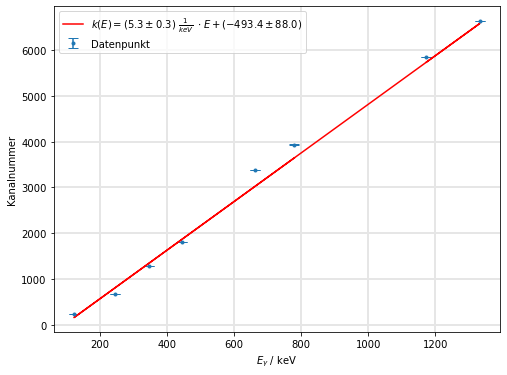

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel-Daten
x_data = np.array([1173.2,1332.5,661.7,121.8,244.7,344.3,444,778.9])
y_data = np.array([5856,
6636,
3377,
233.8,
670.8,
1285,
1797.5,
3938])
y_err=np.array([4,
3,
1,
0.3,
0.4,
1,
0.4,
2])

# Definition der linearen Funktion
def linear_func(x, slope, intercept):
    return slope * x + intercept

# Fit durchführen mit curve_fit
popt, pcov = curve_fit(linear_func, x_data, y_data, sigma=y_err)

# Extrahieren der Fit-Parameter
slope, intercept = popt
slope_err, intercept_err = np.sqrt(np.diag(pcov))

# Ausgabe der Fit-Parameter und deren Unsicherheiten
print(f'Slope (Steigung): {slope} ± {slope_err}')
print(f'Intercept (Achsenabschnitt): {intercept} ± {intercept_err}')
# Berechnung der Vorhersage der linearen Funktion und Residuen
y_fit = linear_func(x_data, slope, intercept)
residuals = y_data - y_fit

# Berechnung von Chi-Quadrat und reduziertem Chi-Quadrat
chi2 = np.sum(residuals**2 / y_err**2)
dof = len(x_data) - len(popt)  # Freiheitsgrade: Anzahl der Datenpunkte minus Anzahl der Fit-Parameter
reduced_chi2 = chi2 / dof

# Ausgabe von Chi-Quadrat und reduziertem Chi-Quadrat
print(f'Reduzierter Chi-Quadrat: {reduced_chi2}')
# Plot der Daten und des Fits mit Fehlerbalken
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_err,fmt='o', markersize=3, capsize=5,  label='Datenpunkt')
plt.plot(x_data, linear_func(x_data, slope, intercept), 'r-', 
        label= rf'$k(E)=({slope:.1f}\pm{slope_err:.1f})\ \frac{{1}}{{keV}}\ \cdot E + ({intercept:.1f}\pm{intercept_err:.1f})$')
plt.ylabel('Kanalnummer')
plt.xlabel(r'$E_\gamma$ / keV')
plt.legend()
plt.grid(linestyle='-', color='0.9', linewidth=2)

# Speichere den Plot
plotname = '521/SzKal.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


Slope (Steigung): 9.51751991238462 ± 9.474980260068532e-05
Intercept (Achsenabschnitt): -1.6831795485602865 ± 0.10735688710770055
Reduzierter Chi-Quadrat: 24.54858478171846


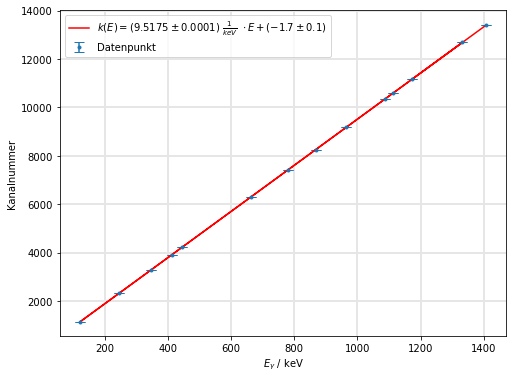

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Beispiel-Daten
x_data = np.array([1173.2,
1332.5,
661.7,
121.8,
244.7,
344.3,
411.1,
444.0,
778.9,
867.4,
964.1,
1085.8,
1112.1,
1408.0])
y_data = np.array([11164.79,
12680.43,
6295.84,
1157.86,
2327.6,
3275.13,
3911.3,
4223.7,
7411.7,
8253.8,
9173.8,
10333.1,
10582.7,
13399])
y_err=np.array([0.08,
0.01,
0.02,
0.03,
0.2,
0.03,
0.4,
0.3,
0.1,
0.1,
0.2,
0.3,
0.2,
0.1])

# Definition der linearen Funktion
def linear_func(x, slope, intercept):
    return slope * x + intercept

# Fit durchführen mit curve_fit
popt, pcov = curve_fit(linear_func, x_data, y_data, sigma=y_err)

# Extrahieren der Fit-Parameter
slope, intercept = popt
slope_err, intercept_err = np.sqrt(np.diag(pcov))

# Ausgabe der Fit-Parameter und deren Unsicherheiten
print(f'Slope (Steigung): {slope} ± {slope_err}')
print(f'Intercept (Achsenabschnitt): {intercept} ± {intercept_err}')
# Berechnung der Vorhersage der linearen Funktion und Residuen
y_fit = linear_func(x_data, slope, intercept)
residuals = y_data - y_fit

# Berechnung von Chi-Quadrat und reduziertem Chi-Quadrat
chi2 = np.sum(residuals**2 / y_err**2)
dof = len(x_data) - len(popt)  # Freiheitsgrade: Anzahl der Datenpunkte minus Anzahl der Fit-Parameter
reduced_chi2 = chi2 / dof

# Ausgabe von Chi-Quadrat und reduziertem Chi-Quadrat
print(f'Reduzierter Chi-Quadrat: {reduced_chi2}')
# Plot der Daten und des Fits mit Fehlerbalken
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_err,fmt='o', markersize=3, capsize=5,  label='Datenpunkt')
plt.plot(x_data, linear_func(x_data, slope, intercept), 'r-', 
        label= rf'$k(E)=({slope:.4f}\pm{slope_err:.4f})\ \frac{{1}}{{keV}}\ \cdot E + ({intercept:.1f}\pm{intercept_err:.1f})$')
plt.ylabel('Kanalnummer')
plt.xlabel(r'$E_\gamma$ / keV')

plt.legend()
plt.grid(linestyle='-', color='0.9', linewidth=2)

# Speichere den Plot
plotname = '521/GeKal.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


### x_data = np.array([121.8, 
244.7, 
344.3, 
411.1, 
444.0, 
778.9, 
867.4, 
964.1, 
1085.8, 
1112.1,
1408.0])
y_data = np.array([1.223236,
1.4641,
1.6129,
1.9321,
1.9881,
2.6569,
3.61,
3.1684,
3.3489,
3.5344,
4.3264
])
y_err=np.array([0.015484,
0.121,
0.01778,
0.278,
0.1974,
0.0652,
0.38,
0.178,
0.2562,
                0.0004,
0.0832
])



# Fit durchführen mit curve_fit
popt, pcov = curve_fit(linear_func, x_data, y_data, sigma=y_err)

# Extrahieren der Fit-Parameter
slope, intercept = popt
slope_err, intercept_err = np.sqrt(np.diag(pcov))

# Ausgabe der Fit-Parameter und deren Unsicherheiten
print(f'Slope (Steigung): {slope} ± {slope_err}')
print(f'Intercept (Achsenabschnitt): {intercept} ± {intercept_err}')
# Berechnung der Vorhersage der linearen Funktion und Residuen
y_fit = linear_func(x_data, slope, intercept)
residuals = y_data - y_fit

# Berechnung von Chi-Quadrat und reduziertem Chi-Quadrat
chi2 = np.sum(residuals**2 / y_err**2)
dof = len(x_data) - len(popt)  # Freiheitsgrade: Anzahl der Datenpunkte minus Anzahl der Fit-Parameter
reduced_chi2 = chi2 / dof

# Ausgabe von Chi-Quadrat und reduziertem Chi-Quadrat
print(f'Reduzierter Chi-Quadrat: {reduced_chi2}')
# Plot der Daten und des Fits mit Fehlerbalken
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=y_err,fmt='o', markersize=3, capsize=5,  label='Datenpunkt')
plt.plot(x_data, linear_func(x_data, slope, intercept), 'r-', 
        label= rf'$(\Delta E) ^2=({slope:.4f}\pm{slope_err:.4f})\ keV\ \cdot E_\gamma + ({intercept:.2f}\pm{intercept_err:.2f}) keV^2$')
plt.ylabel(r'$(\Delta E)^2$/ keV$^2$')
plt.xlabel(r'$E_\gamma$ / keV')

plt.legend()
plt.grid(linestyle='-', color='0.9', linewidth=2)

# Speichere den Plot
plotname = '521/fwhm.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


**Langzeitmessung**

Daten eingelesen
 Livetime in s: 106053.708
Daten eingelesen
 Livetime Messung in s: 62187.942


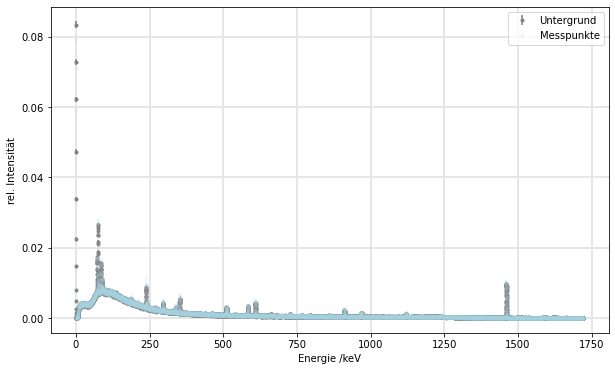

In [17]:


# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/langzeit_untergrund.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

print("Daten eingelesen") 

total_secondsBG = parse_duration(livetime_durations[0])

y_dataBG = np.array(channel_data_list[:-1])/ total_secondsBG
x_dataBG = np.arange(len(y_dataBG))
y_errBG =  np.sqrt(np.array(channel_data_list[:-1])) / total_secondsBG
x_dataBG=0.105070*x_dataBG+0.18
print(f' Livetime in s: {total_secondsBG}')


# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/langzeit_probe.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

print("Daten eingelesen") 

total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds
x_data=0.105070*x_data+0.18
print(f' Livetime Messung in s: {total_seconds}')

# y_data=y_data-y_dataBG

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_dataBG, y_dataBG, yerr=y_errBG, fmt='.', label='Untergrund', color='gray')
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue', alpha=0.1)

plt.xlabel('Energie /keV')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()
# Speichere den Plot
plotname = '521/Langzeit.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()



Peak 1:
  Höhe (a): 0.0010884589200822552 ± 5.407473501997511e-05
  Mean (mu): 1460.6611334424574 ± 0.007495408094063429
  Standard deviation (sigma): 0.130631982379405 ± 0.007496395082816263
  Background (b): 5.708626829897084e-06 ± 9.310164884980222e-07

Peak 2:
  Höhe (a): 0.00020434654012433434 ± 3.451549401072906e-05
  Mean (mu): 1120.4085581619356 ± 0.1406948773604875
  Standard deviation (sigma): 0.722600469673515 ± 0.14162885508727116
  Background (b): 1.0217623069045887e-05 ± 3.2454122021213975e-06

Peak 3:
  Höhe (a): 0.0005317198891637095 ± 3.762702501172516e-05
  Mean (mu): 911.0941381449145 ± 0.058016628902778464
  Standard deviation (sigma): 0.717163477986405 ± 0.05973948515706401
  Background (b): 1.2651905806645088e-05 ± 7.467900513381035e-06

Peak 4:
  Höhe (a): 0.0008026308561077902 ± 5.3427941190952075e-05
  Mean (mu): 609.4213609312751 ± 0.05340420334962524
  Standard deviation (sigma): 0.7035284795505145 ± 0.05540611758162462
  Background (b): 2.8385909388355516e-0

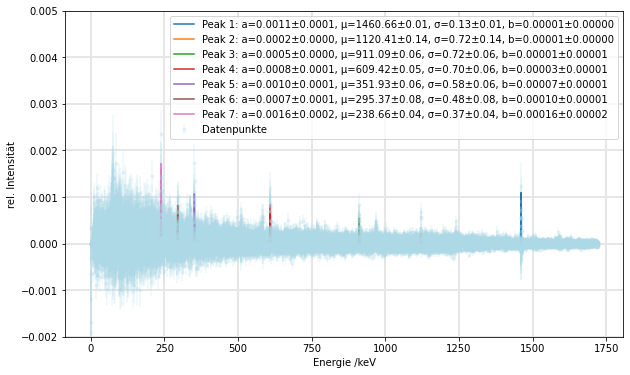

In [112]:
y_dataNew=(y_data-y_dataBG)
y_errNew=np.sqrt(y_err**2+y_errBG**2)

peak_params = []
peak_covs = []

# # Fit first peak
mask=(x_data>1200) &(x_data<1800)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]


initial_guess_first_peak = (0.001,1460,-0.13,1)
params_first_peak, pcov_first_peak = fit_peak(x_dataM, y_dataM, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)

mask=(x_data>1075) &(x_data<1175)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]
initial_guess_peak = (0.0002, 1120, 0.7, 1)
params_peak, pcov_peak = fit_peak(x_dataM, y_dataM, initial_guess_peak)
peak_params.append(params_peak)
peak_covs.append(pcov_peak)

# # Manuell festgelegte Anfangswerte für den zweiten Peak
mask=(x_data>900) &(x_data<925)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]
initial_guess_second_peak = (0.0004, 911, 0.7, 1)
params_second_peak, pcov_second_peak = fit_peak(x_dataM, y_dataM, initial_guess_second_peak)
peak_params.append(params_second_peak)
peak_covs.append(pcov_second_peak)

# Dritter Peak
mask=(x_data>600) &(x_data<620)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]
initial_guess_third_peak = (0.0008, 609, 0.7, 1)
params_third_peak, pcov_third_peak = fit_peak(x_dataM, y_dataM, initial_guess_third_peak)
peak_params.append(params_third_peak)
peak_covs.append(pcov_third_peak)


mask=(x_data>300) &(x_data<400)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]
initial_guess_sixth_peak = (0.0004, 351.3, 0.4, 1)
params_sixth_peak, pcov_sixth_peak = fit_peak(x_dataM, y_dataM, initial_guess_sixth_peak)
peak_params.append(params_sixth_peak)
peak_covs.append(pcov_sixth_peak)


mask=(x_data>250) &(x_data<350)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]
initial_guess_fifth_peak = (0.0004, 295.3, 0.4, 1)
params_fifth_peak, pcov_fifth_peak = fit_peak(x_dataM, y_dataM, initial_guess_fifth_peak)
peak_params.append(params_fifth_peak)
peak_covs.append(pcov_fifth_peak)

# # Vierter Peak
mask=(x_data>200) &(x_data<250)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]
initial_guess_fourth_peak = (0.0015, 238, 0.37, 1)

params_fourth_peak, pcov_fourth_peak = fit_peak(x_dataM, y_dataM, initial_guess_fourth_peak)
# params_fourth_peak, pcov_fourth_peak = fit_peak(x_data_fourth_peak, y_data_fourth_peak, initial_guess_fourth_peak)
peak_params.append(params_fourth_peak)
peak_covs.append(pcov_fourth_peak)

# # Fünfter Peak
# x_data_fifth_peak = x_data[(x_data > params_fourth_peak[1] + 3 * params_fourth_peak[2])]
# y_data_fifth_peak = y_data[(x_data > params_fourth_peak[1] + 3 * params_fourth_peak[2])]
# initial_guess_fifth_peak = (120, 4200, 15, 30)
# params_fifth_peak, pcov_fifth_peak = fit_peak(x_data_fifth_peak, y_data_fifth_peak, initial_guess_fifth_peak)
# peak_params.append(params_fifth_peak)
# peak_covs.append(pcov_fifth_peak)

# # Sechster Peak
# x_data_sixth_peak = x_data[(x_data > params_fifth_peak[1] + 3 * params_fifth_peak[2])]
# y_data_sixth_peak = y_data[(x_data > params_fifth_peak[1] + 3 * params_fifth_peak[2])]
# initial_guess_sixth_peak = (710, 7400, 10, 50)
# params_sixth_peak, pcov_sixth_peak = fit_peak(x_data_sixth_peak, y_data_sixth_peak, initial_guess_sixth_peak)
# peak_params.append(params_sixth_peak)
# peak_covs.append(pcov_sixth_peak)

# # Siebter Peak
# x_data_seventh_peak = x_data[(x_data > params_sixth_peak[1] + 3 * params_sixth_peak[2])]
# y_data_seventh_peak = y_data[(x_data > params_sixth_peak[1] + 3 * params_sixth_peak[2])]
# initial_guess_seventh_peak = (196, 8250, 15, 30)
# params_seventh_peak, pcov_seventh_peak = fit_peak(x_data_seventh_peak, y_data_seventh_peak, initial_guess_seventh_peak)
# peak_params.append(params_seventh_peak)
# peak_covs.append(pcov_seventh_peak)

# # Achter Peak
# x_data_eighth_peak = x_data[(x_data > params_seventh_peak[1] + 3 * params_seventh_peak[2])]
# y_data_eighth_peak = y_data[(x_data > params_seventh_peak[1] + 3 * params_seventh_peak[2])]
# initial_guess_eighth_peak = (700, 9125, 45, 60)
# params_eighth_peak, pcov_eighth_peak = fit_peak(x_data_eighth_peak, y_data_eighth_peak, initial_guess_eighth_peak)
# peak_params.append(params_eighth_peak)
# peak_covs.append(pcov_eighth_peak)

# # Neunter Peak
# x_data_ninth_peak = x_data[(x_data > params_eighth_peak[1] + 3 * params_eighth_peak[2])]
# y_data_ninth_peak = y_data[(x_data > params_eighth_peak[1] + 3 * params_eighth_peak[2])]
# initial_guess_ninth_peak = (374, 10333, 10, 50)
# params_ninth_peak, pcov_ninth_peak = fit_peak(x_data_ninth_peak, y_data_ninth_peak, initial_guess_ninth_peak)
# peak_params.append(params_ninth_peak)
# peak_covs.append(pcov_ninth_peak)

# # Zehnter Peak
# x_data_tenth_peak = x_data[(x_data > params_ninth_peak[1] + 3 * params_ninth_peak[2])]
# y_data_tenth_peak = y_data[(x_data > params_ninth_peak[1] + 3 * params_ninth_peak[2])]
# initial_guess_tenth_peak = (70, 11000, 10, 50)
# params_tenth_peak, pcov_tenth_peak = fit_peak(x_data_tenth_peak, y_data_tenth_peak, initial_guess_tenth_peak)
# peak_params.append(params_tenth_peak)
# peak_covs.append(pcov_tenth_peak)

# # Elfter Peak
# x_data_eleventh_peak = x_data[(x_data > params_tenth_peak[1] + 3 * params_tenth_peak[2])]
# y_data_eleventh_peak = y_data[(x_data > params_tenth_peak[1] + 3 * params_tenth_peak[2])]
# initial_guess_eleventh_peak = (526, 13400, 10, 50)
# params_eleventh_peak, pcov_eleventh_peak = fit_peak(x_data_eleventh_peak, y_data_eleventh_peak, initial_guess_eleventh_peak)
# peak_params.append(params_eleventh_peak)
# peak_covs.append(pcov_eleventh_peak)

# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_dataNew, yerr=y_errNew, fmt='.', label='Datenpunkte', color='lightblue',alpha=0.2)
# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    if sigma_fit < 0:
        sigma_fit = -1 * sigma_fit
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.4f}±{delta_a_fit:.4f}, μ={mu_fit:.2f}±{delta_mu_fit:.2f}, σ={sigma_fit:.2f}±{delta_sigma_fit:.2f}, b={b_fit:.5f}±{delta_b_fit:.5f}')
    

plt.ylim(-0.002,0.005)
plt.xlabel('Energie /keV')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()
# Speichere den Plot
plotname = '521/LangzeitReinigt.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()



Peak 1:
  Höhe (a): 0.0008652579146467036 ± 26.805734774691604
  Mean (mu): 186.03938610111453 ± 1368.307834420735
  Standard deviation (sigma): 0.021301164600862912 ± 337.6478049196225
  Background (b): 0.00011903565155741001 ± 1.2254089853045252e-05



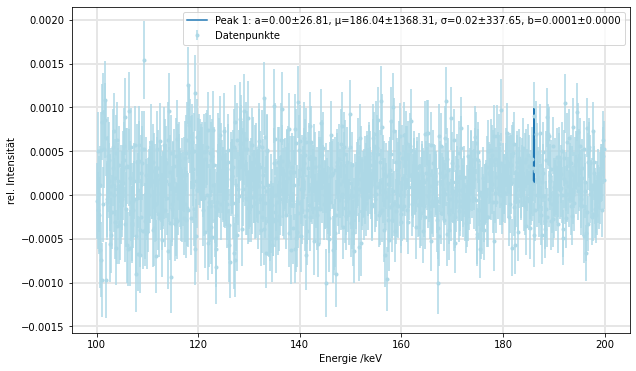

In [113]:

peak_params = []
peak_covs = []

# Fit first peak
mask=(x_data>100) &(x_data<200)
x_dataM=x_data[mask]
y_dataM=y_dataNew[mask]
y_errM=y_errNew[mask]


initial_guess_first_peak = (0.001,186,0.1,1)
params_first_peak, pcov_first_peak = fit_peak(x_dataM, y_dataM, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)

# # Manuell festgelegte Anfangswerte für den zweiten Peak
# x_data_second_peak = x_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(x_data))]
# y_data_second_peak = y_data[(x_data > params_first_peak[1] + 3 * params_first_peak[2]) & (x_data < len(y_data))]
# initial_guess_second_peak = (3000, 2400, 15, 30)
# params_second_peak, pcov_second_peak = fit_peak(x_data_second_peak, y_data_second_peak, initial_guess_second_peak)

# # Speichern der Parameter für den zweiten Peak
# peak_params.append(params_second_peak)
# peak_covs.append(pcov_second_peak)


# Print fit parameters for each peak with uncertainties
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print(f'  Background (b): {b_fit} ± {delta_b_fit}')
    print()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_dataM, y_dataM, yerr=y_errM, fmt='.', label='Datenpunkte', color='lightblue')
# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    if sigma_fit < 0:
        sigma_fit = -1 * sigma_fit
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.2f}±{delta_a_fit:.2f}, μ={mu_fit:.2f}±{delta_mu_fit:.2f}, σ={sigma_fit:.2f}±{delta_sigma_fit:.2f}, b={b_fit:.4f}±{delta_b_fit:.4f}')
    


plt.xlabel('Energie /keV')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()
# Speichere den Plot

plt.show()



Fitted parameters:
a = -10.385939331912203 ± 15.373326868537017
b = 7.537341002333431 ± 2.437956725166655
Reduced chi-squared: 0.2796858449595525


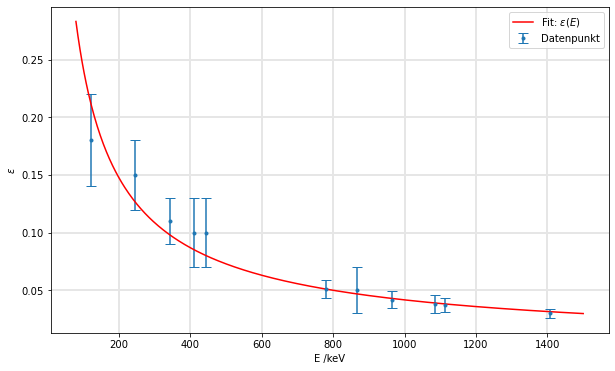

In [56]:
y_data=np.array([0.18,
0.15,
0.11,
0.10,
0.10,
0.051,
0.05,
0.042,
0.038,
0.037,
0.030
])
y_err=np.array([0.04,
0.03,
0.02,
0.03,
0.03,
0.008,
0.02,
0.007,
0.008,
0.006,
0.004
])

x_data=np.array([121.8, 
244.7, 
344.3, 
411.1, 
444.0, 
778.9, 
867.4, 
964.1, 
1085.8, 
1112.1, 
1408.0 ])


# Fit durchführen mit curve_fit
popt, pcov = curve_fit(epsilon, x_data, y_data, sigma=y_err, absolute_sigma=True)

# Extract fitting parameters and their uncertainties
a, b= popt
a_err, b_err= np.sqrt(np.diag(pcov))

# Calculate the residuals
residuals = y_data - epsilon(x_data, *popt)

# Calculate the chi-squared value
chi_squared = np.sum((residuals / y_err) ** 2)

# Calculate the degrees of freedom (number of data points - number of fitted parameters)
dof = len(y_data) - len(popt)

# Calculate the reduced chi-squared value
reduced_chi_squared = chi_squared / dof

# Print the fitting parameters, their uncertainties, and reduced chi-squared
print(f"Fitted parameters:")
print(f"a = {a} ± {a_err}")
print(f"b = {b} ± {b_err}")
# print(f"c = {c} ± {c_err}")
# print(f"d = {d} ± {d_err}")
# print(f"e = {e} ± {e_err}")
print(f"Reduced chi-squared: {reduced_chi_squared}")

# Plot the data and the fit
plt.figure(figsize=(10, 6))

plt.errorbar(x_data, y_data, yerr=y_err, fmt='o', markersize=3, capsize=5,  label='Datenpunkt')
newx_data=np.linspace(80,1500,500)
plt.plot(newx_data, epsilon(newx_data, *popt), label='Fit: $\\epsilon(E)$', color='red')
plt.xlabel('E /keV')
plt.ylabel('$\\epsilon$')
plt.legend()
plt.grid(linestyle='-', color='0.9', linewidth=2)

# Speichere den Plot
plotname = '521/relEff.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()
